# Loading libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# Energy Demand

In [2]:
demand = pd.read_csv('Demand_Train.csv', header=None)
demand_pred = pd.read_csv('Demand_Train_pred.csv', header=None)

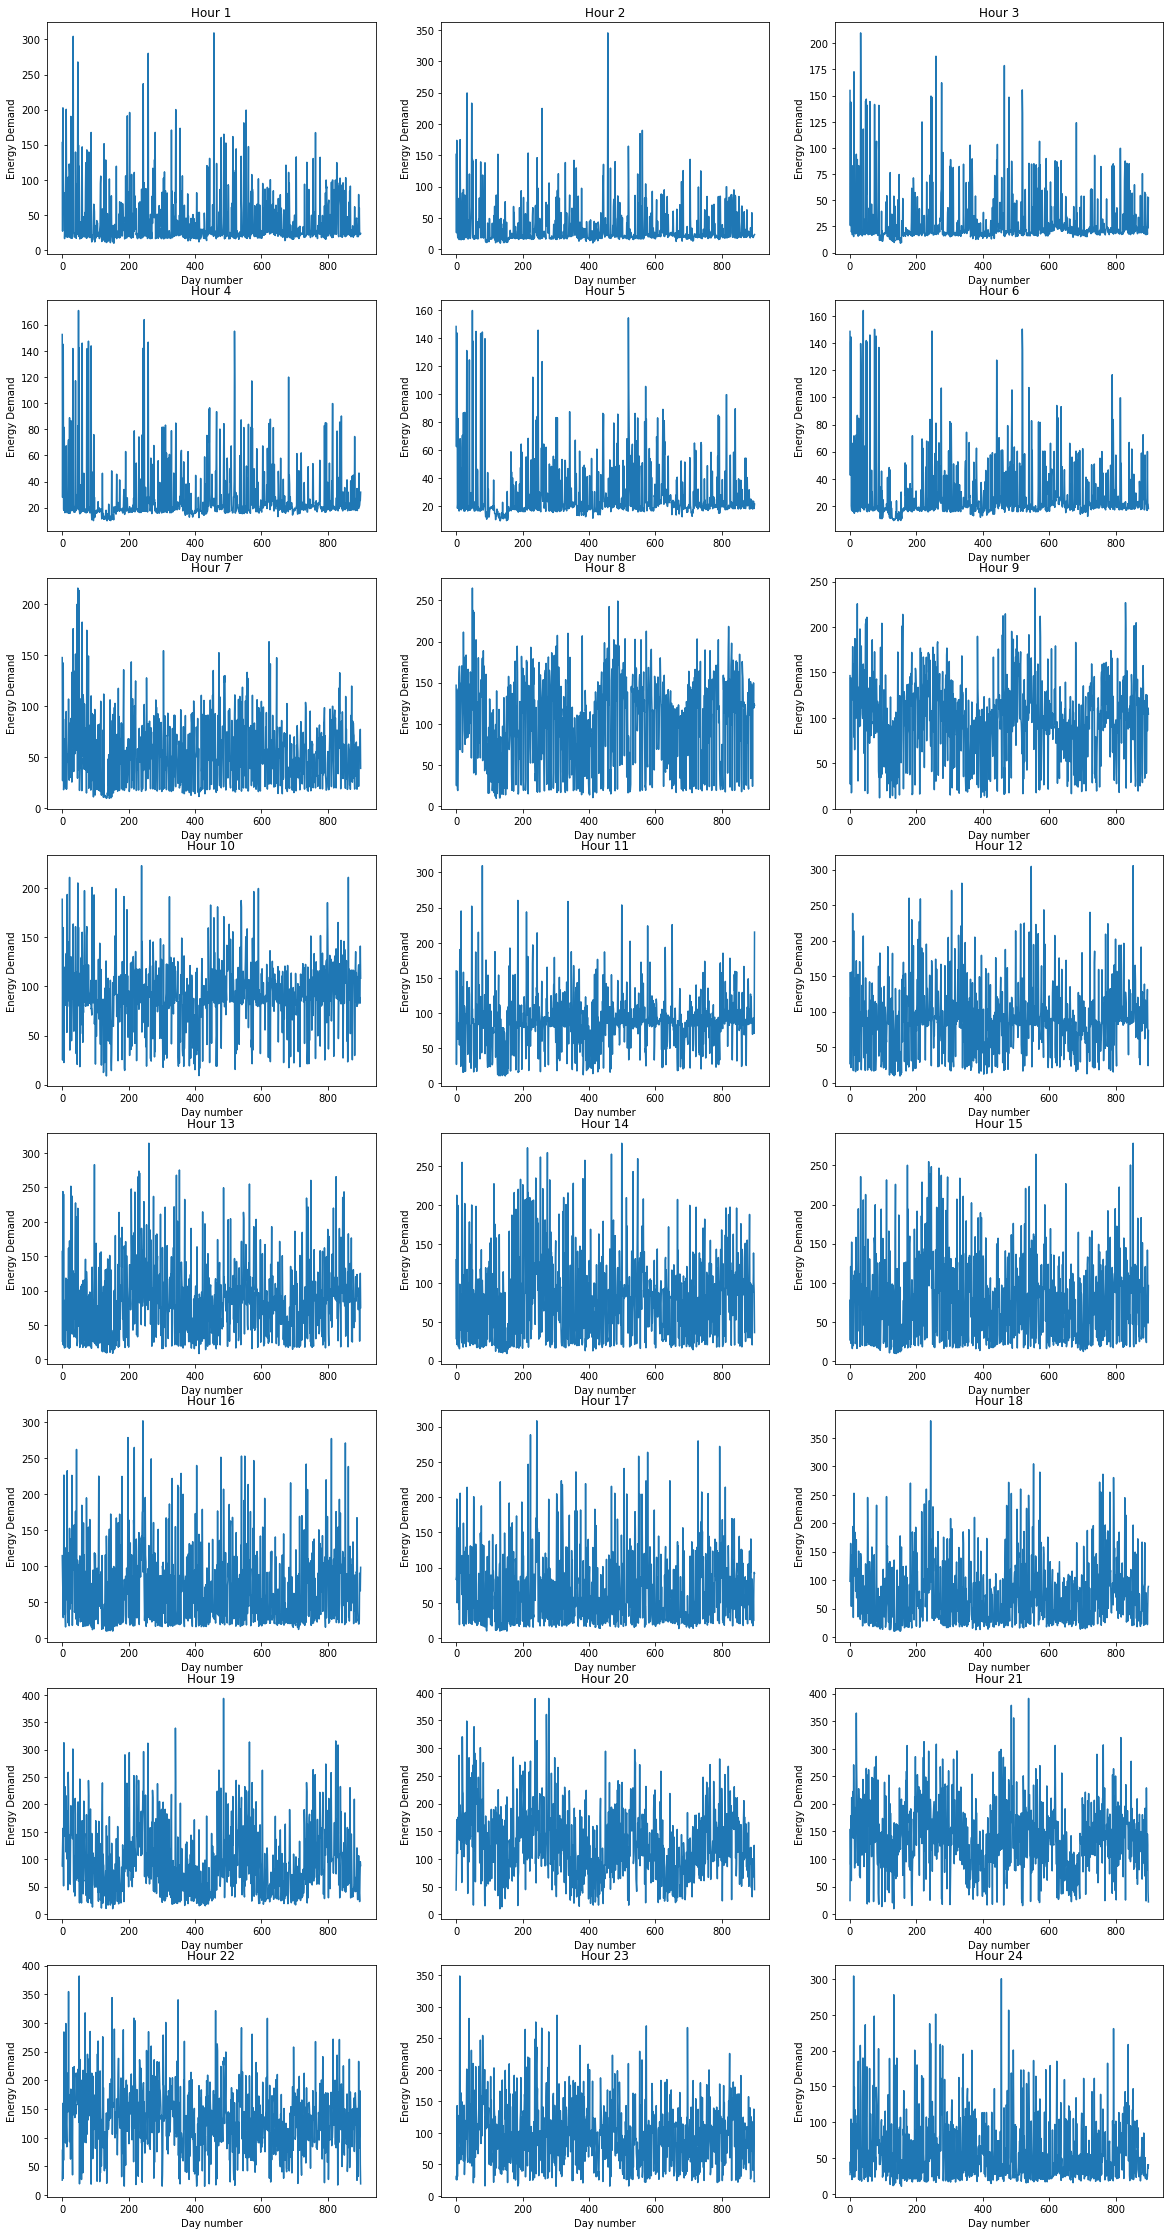

In [3]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Energy Demand')
    plt.plot(demand[i])    

Energy demands don't follow any pattern and can't be predicted as a function of time.

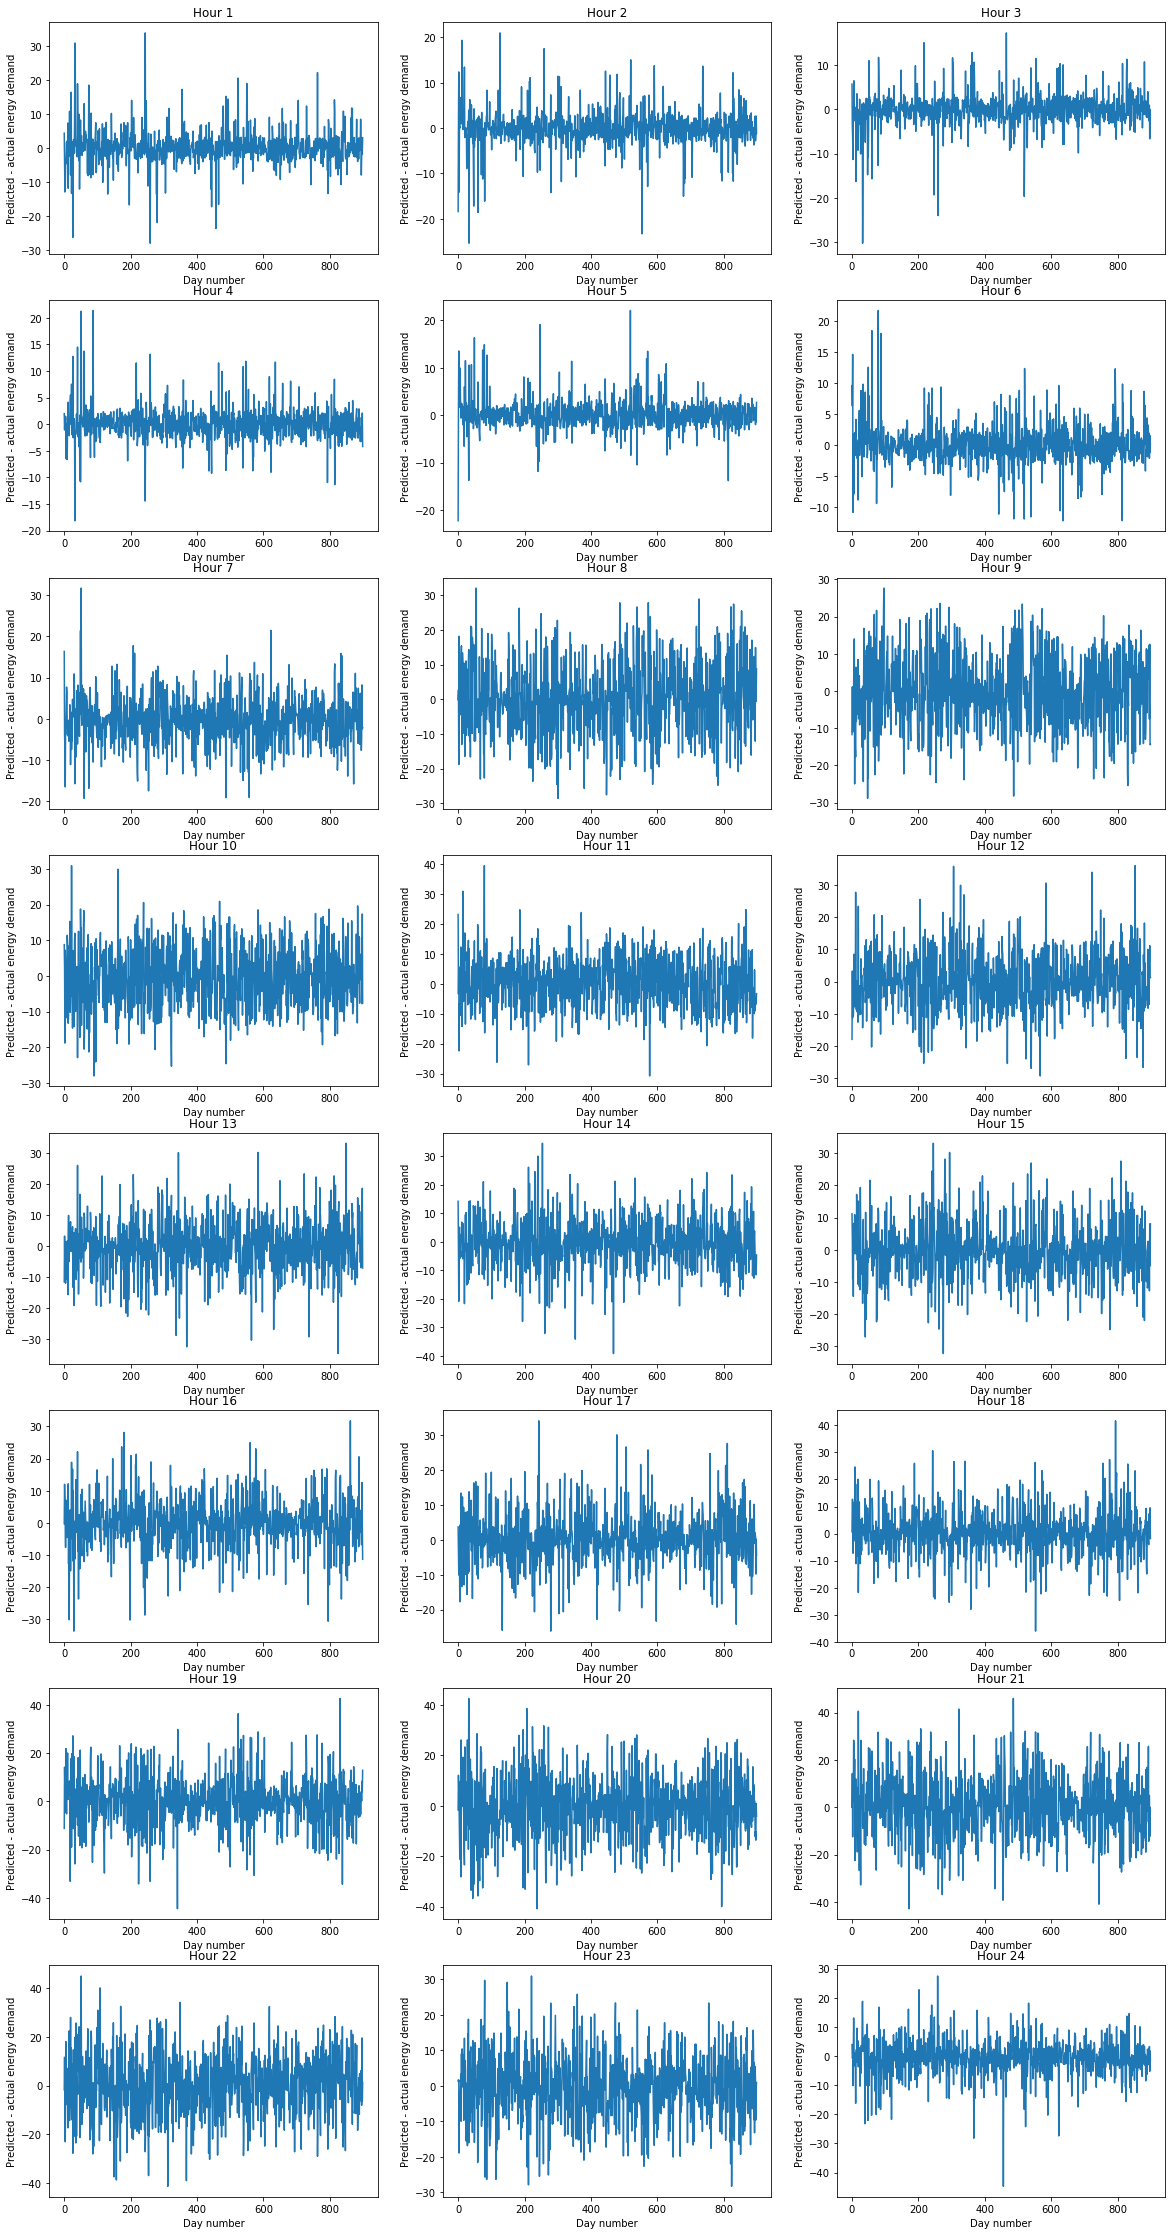

In [4]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Predicted - actual energy demand')
    plt.plot(demand_pred[i] - demand[i])

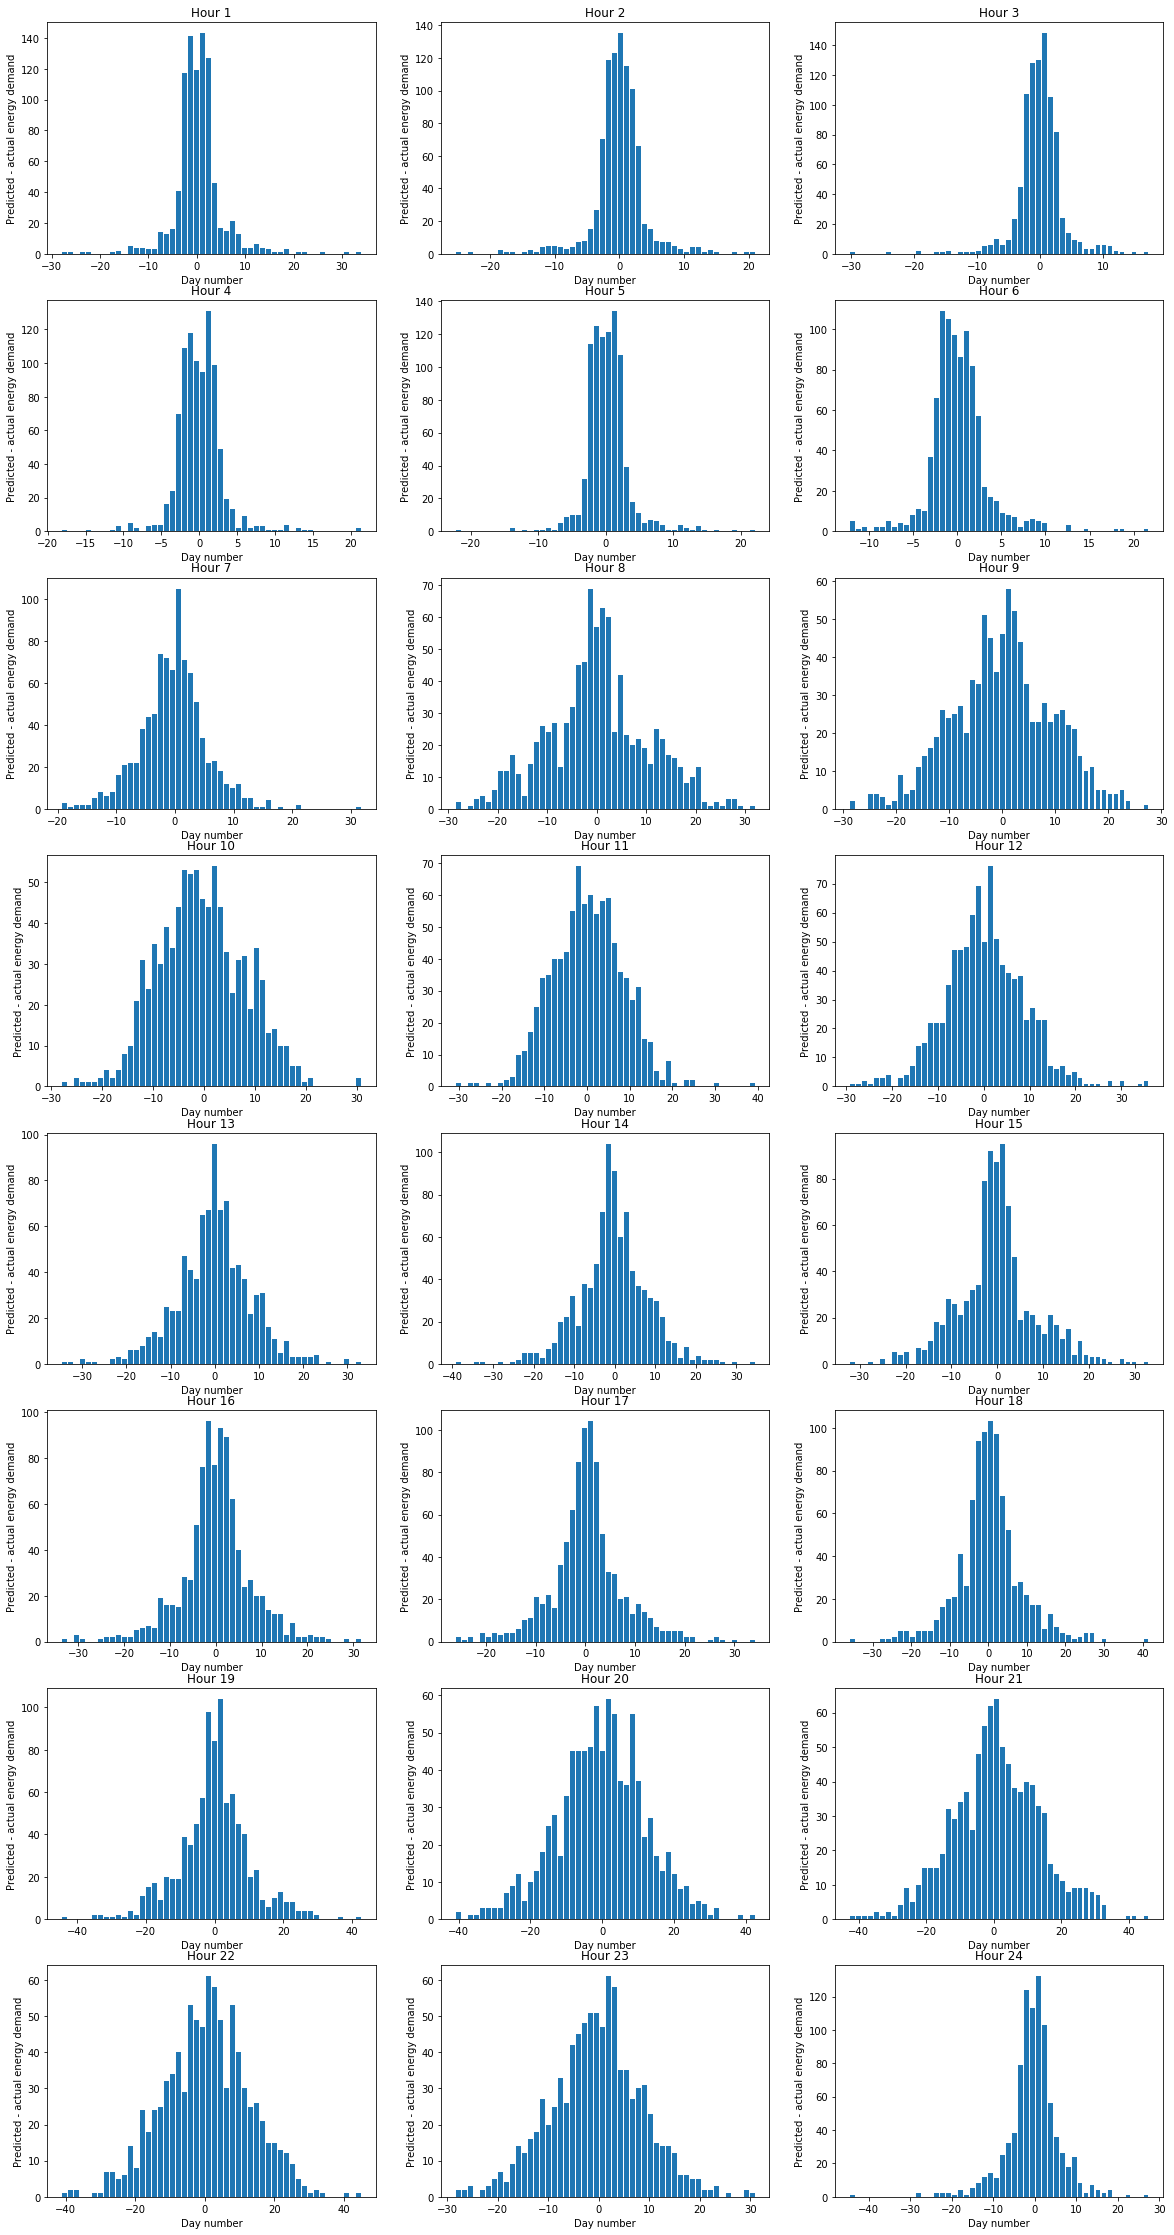

In [5]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Predicted - actual energy demand')
    plt.hist(demand_pred[i] - demand[i], bins=50, rwidth=0.8)

As we can see from histogram above the difference between predicted and actual demand is mostly noise which can be approximated as normal distribution with appropriate variance and zero mean. Therefore, it is easy to predict the actual demand from predicted actual demand.

# Solar output

In [6]:
solar = pd.read_csv('Solar_Train.csv', header=None)
solar_pred = pd.read_csv('Solar_Train_pred.csv', header=None)

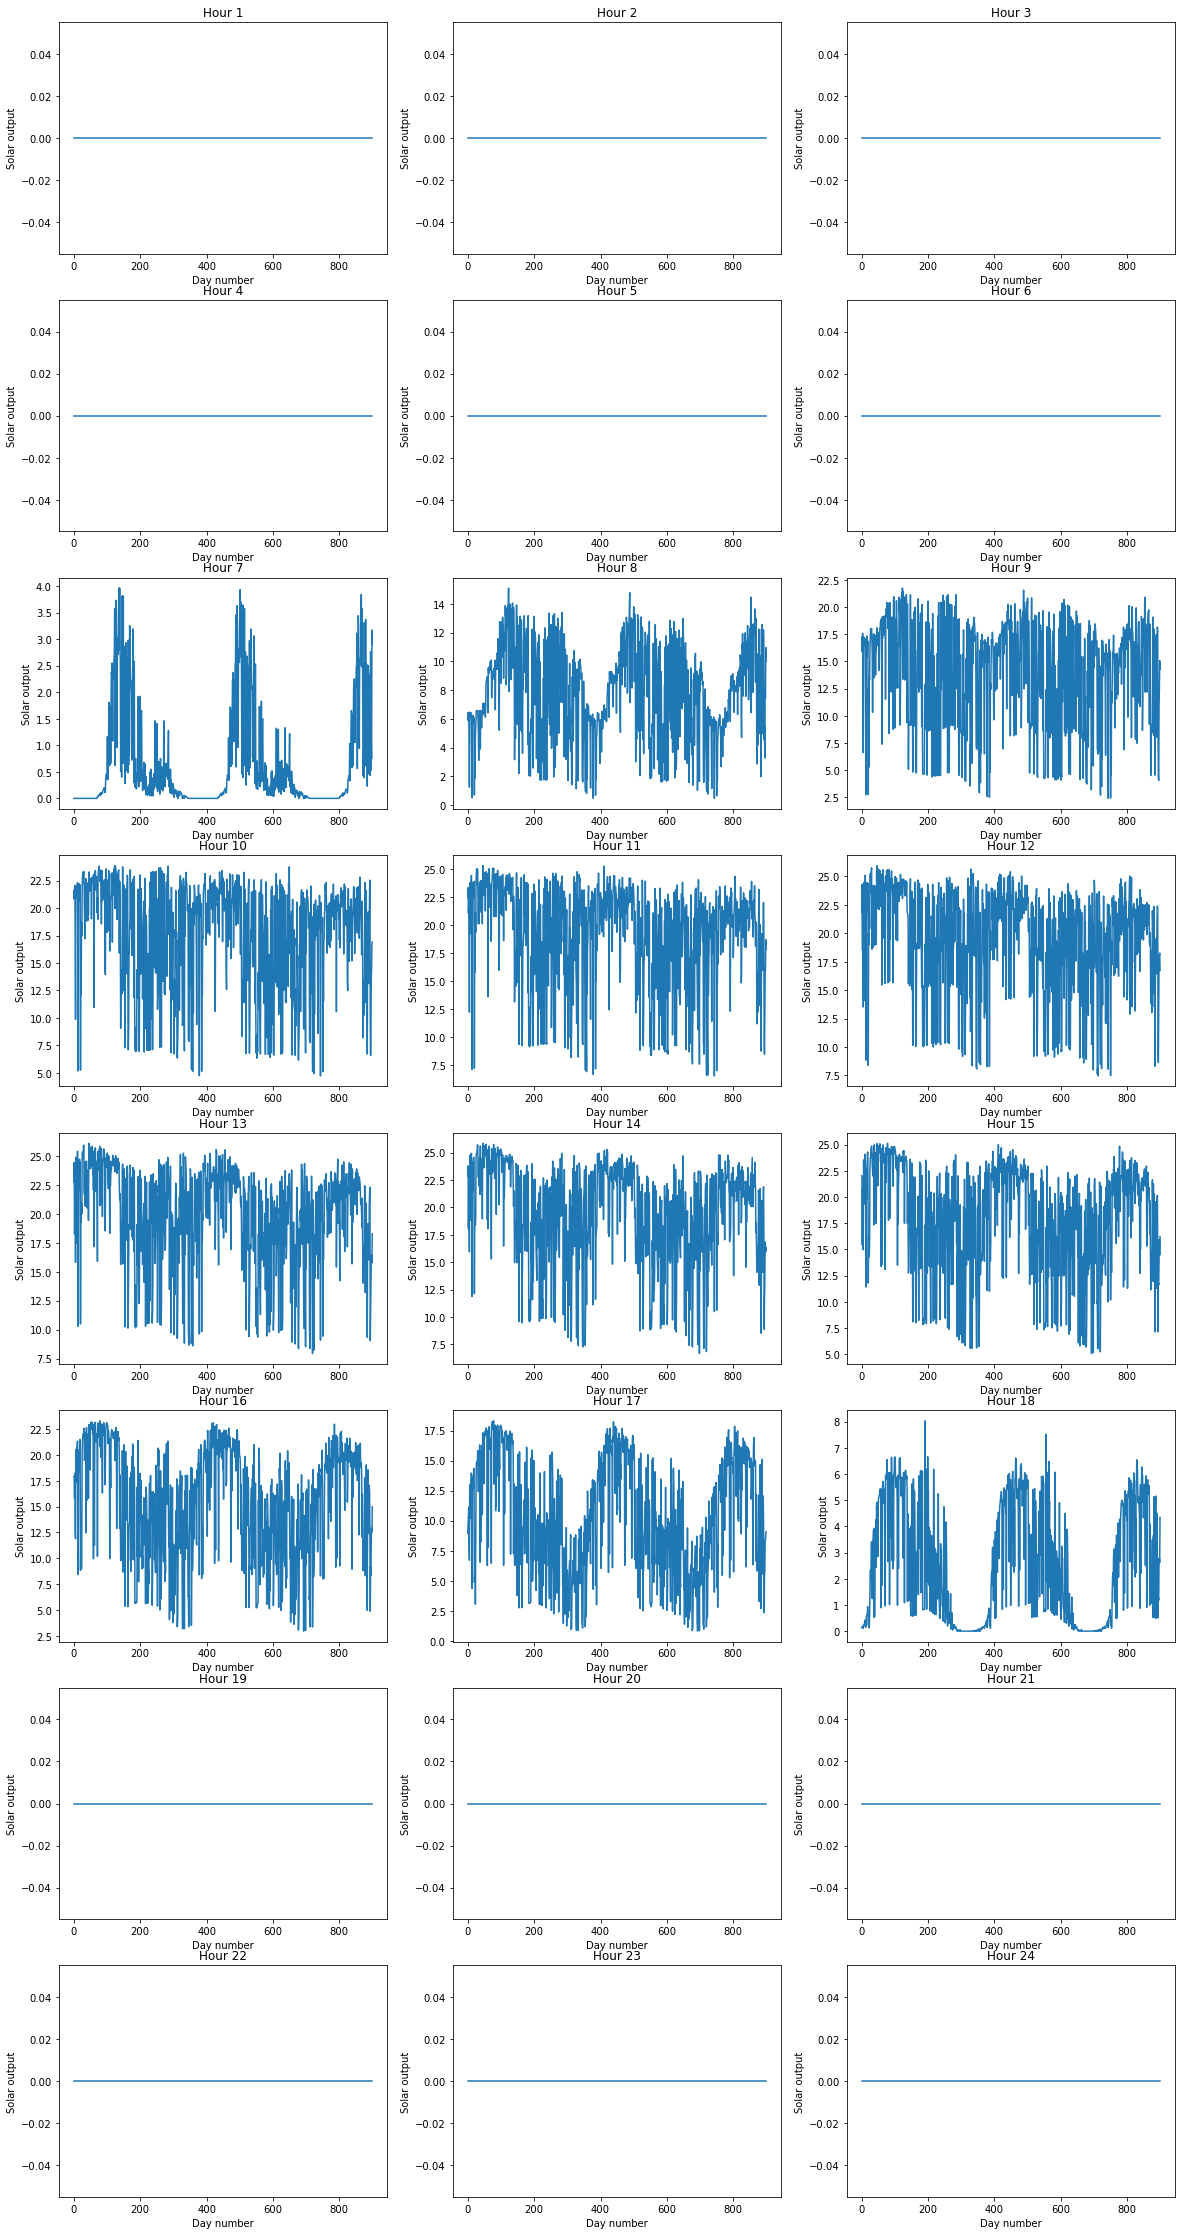

In [7]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Solar output')
    plt.plot(solar[i])    

In [8]:
difference = []
for i in range(900-365):
    difference.append(solar[6][365 + i] - solar[6][i])
np.mean(np.array(diff))

NameError: name 'diff' is not defined

We can see from the above graphs that the solar output is periodic with period of 1 year. This claim is further supported by the fact the average difference between solar ouputs of same date of two consecutive years is very small. Therefore we can predict the solar output with great accuracy.

In [ ]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Predicted - Actual solar ouput')
    plt.plot(solar_pred[i] - solar[i])

We don't really need predicted solar output for predicting actual solar output as because of periodic nature od solar ouput it is the actual solar output of the day exactly a year back.

# Market Price

In [ ]:
price = pd.read_csv('Price_Train.csv', header=None)
price_pred = pd.read_csv('Price_Train_pred.csv', header=None)

In [ ]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Market Price')
    plt.plot(price[i])    

We can see that market prices are periodic. Considering one hour specificly,

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Hour 0')
plt.xlabel('Day')
plt.ylabel('Market price.')
plt.plot(price[0])

We can clearly see that the market prices are periodic. We now find out the time period,

In [ ]:
min_spike_day = list(price[0][price[0] < 0.8].index)
time_period = []
for i in range(len(min_spike_day) - 1):
    time_period.append(list(min_spike_day)[i + 1] - min_spike_day[i])
print(time_period)

Suprisingly, the time period is the number of days of a month. That is, on a particular date of the month the market price drops drastically and this trend is consistent for the period of two years. This trend is further verified by the following figure.

In [ ]:
start = 15
plt.figure(figsize=(20,50))
for i in range(27):
    plt.subplot(9, 3, i + 1)
    plt.title('Month ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Market Price')
    plt.plot(price[0][start:start + time_period[i]])
    start = start + time_period[i]

Therefore we can very accurately predict the market price using the perfecly periodic nature of market prices.

In [ ]:
plt.figure(figsize=(20,40))
for i in range(24):
    plt.subplot(8, 3, i + 1)
    plt.title('Hour ' + str(i + 1))
    plt.xlabel('Day number')
    plt.ylabel('Predicted - Actual Market Price')
    plt.plot(price_pred[i] - price[i])    

The predicted market prices are not very useful here as we are completely able to determine them using previous market prices.

In the above analysis we have seen that we can predict market price and solar output with perfect accuracy, and the energy demand with a good accuracy.